In [1]:
import os
import numpy as np

In [2]:
path_to_series = os.path.join(".", "example", "datasets", "ecg-heartbeat-av.csv")
f = open(path_to_series)
series = np.array(f.readlines(), dtype=np.double)
print(series.shape)
fs = 128  # sampling frequency

(3001,)


In [13]:
# uncomment this code block for the multivariate ECG example:

path_to_series = os.path.join(".", "example", "datasets", "mitdb_patient214.csv")
f = open(path_to_series)
series = np.array([line.split(',') for line in f.readlines()], dtype=np.double)
print(series.shape)
fs = 360  # sampling frequency

(3600, 2)


In [14]:
# z-normalize time series
series = (series - np.mean(series, axis=0)) / np.std(series, axis=0)

# Parameter rho determines the 'strictness' of the algorithm  
#   - higher -> more strict (more similarity in discovered motif sets)
#   - lower  -> less strict (less similarity in discovered motif sets) 
rho = 0.6

# Number of motifs to be found
nb_motifs = 2

# Heartbeats last 0.6s - 1s (equivalent to 60-100 bpm)
l_min = int(0.6 * fs)
l_max = int(  1 * fs)

# This parameter determines how much the motifs may overlap (intra and inter motif set)
overlap = 0

In [15]:
import locomotif.locomotif as locomotif
motif_sets = locomotif.apply_locomotif(series, rho, l_min, l_max, nb_motifs, overlap=overlap)
print(motif_sets)

[[(2666, 2933), (1892, 2138), (1039, 1334), (2334, 2667), (3174, 3491), (628, 1039), (1587, 1893), (1, 263)], [(2933, 3155), (2138, 2333), (1334, 1558)]]


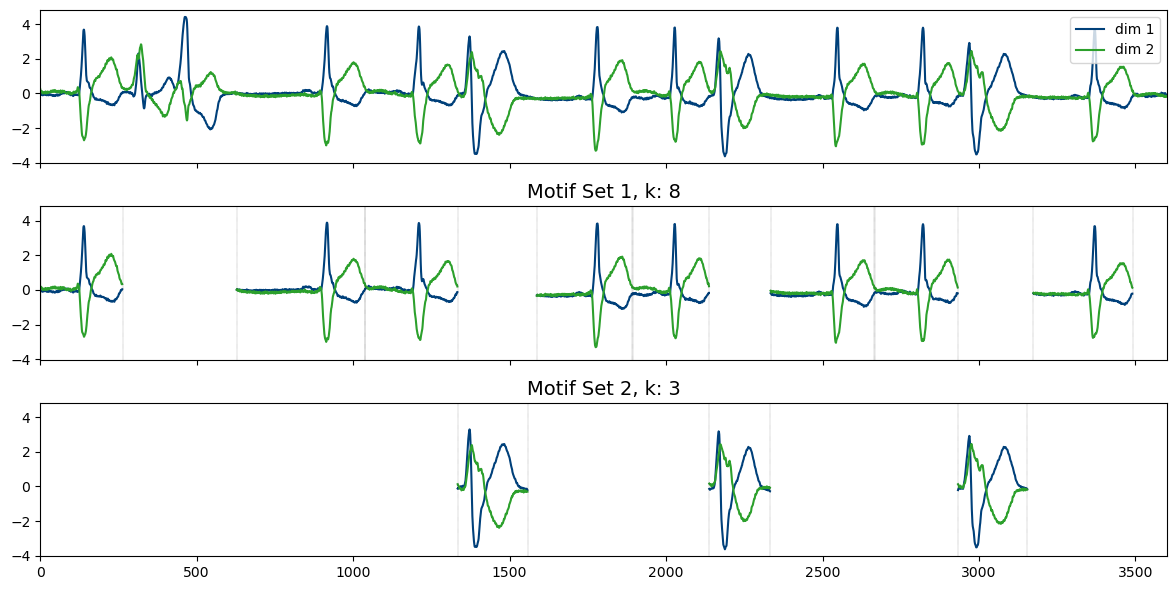

In [16]:
import locomotif.visualize as visualize
import matplotlib.pyplot as plt
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

### Without Time Warping

In [17]:
motif_sets = locomotif.apply_locomotif(series, rho, l_min, l_max, nb_motifs, overlap=overlap, warping=False)
print(motif_sets)

[[(776, 1050), (2407, 2681), (3229, 3503), (1639, 1913), (1070, 1344), (0, 274), (2680, 2954)], [(1357, 1631), (2954, 3228)]]


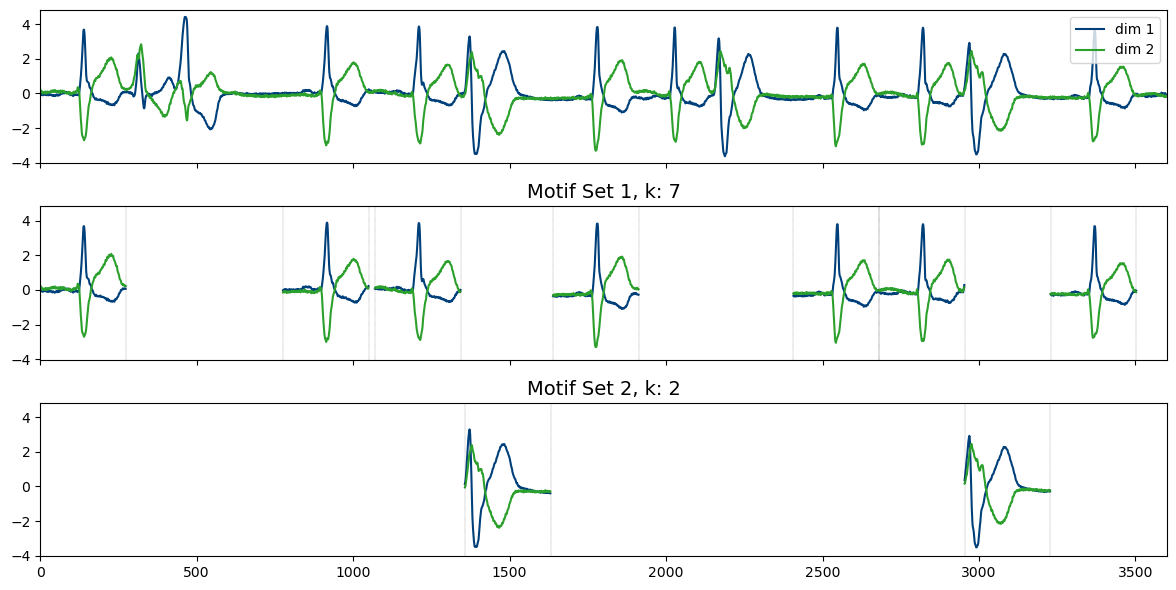

In [18]:
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

### Start and End Constraints

In [19]:
# start_mask specifies whether a motif can start at a certain time index (same for end_mask)

# for example: a candidate segment can only start in the second half of the time series:
n = len(series)
start_mask = np.full(n, True)
start_mask[:n//2] = False

In [20]:
motif_sets = locomotif.apply_locomotif(series, rho, l_min, l_max, nb_motifs, overlap=overlap, start_mask=start_mask, end_mask=None)
print(motif_sets)

[[(2666, 2933), (1892, 2138), (1039, 1334), (2334, 2667), (3174, 3491), (628, 1039), (1587, 1893), (1, 263)], [(2933, 3155), (2138, 2333), (1334, 1558)]]


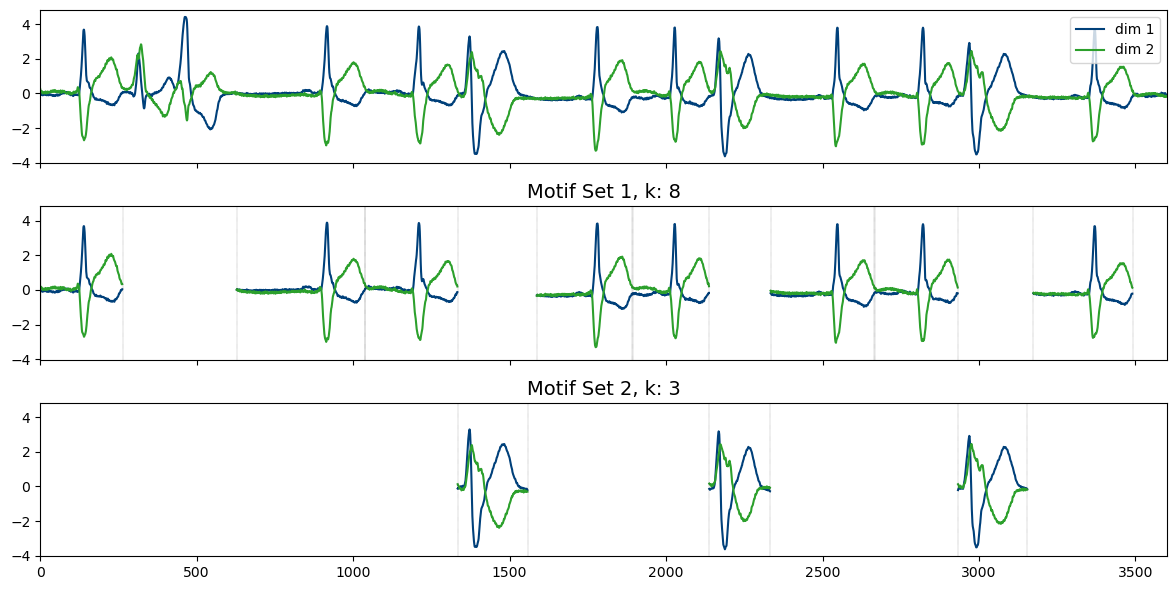

In [21]:
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()